# Ensemble method: Stacking
Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on a complete training set, then the meta-model is trained on the outputs of the base level model as features.

In [7]:
import pandas as pd
from io import StringIO
import numpy as np
import pickle 
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

Load required files

In [9]:
with open('pickles/features_train.pkl', 'rb') as f:
    features_train = pickle.load(f)

with open('pickles/labels_train.pickle', 'rb') as f:
    labels_train = pickle.load(f)

with open('pickles/features_test.pkl', 'rb') as f:
    features_test = pickle.load(f)

with open('pickles/labels_test.pkl', 'rb') as f:
    labels_test = pickle.load(f)

We create a stack using mlxtend with the base classifiers as XGB, GBM and RFC and with a met classifier Logistic Regression

In [10]:
clf1 = XGBClassifier(
    base_score=0.5, booster=None, colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
    importance_type='gain', interaction_constraints=None,
    learning_rate=0.05, max_delta_step=0, max_depth=2,
    min_child_weight=1, monotone_constraints=None,
    n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
    objective='multi:softprob', random_state=42, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
    tree_method=None, validate_parameters=False, verbosity=None
)

clf2 = GradientBoostingClassifier(random_state=8)

clf3 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [11]:
sclf.fit(features_train, labels_train)

/home/kevin/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


StackingClassifier(average_probas=False,
                   classifiers=[XGBClassifier(base_score=0.5, booster=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.05,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=140, n_job...
                   meta_classifier=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
    

The training accuracy is: 
0.8201780415430268
The test accuracy is: 
0.6445497630331753
Classification report
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        41
           1       0.50      0.82      0.62        45
           2       0.11      0.06      0.08        16
           3       0.58      0.81      0.68        32
           4       0.78      0.74      0.76        43
           5       0.83      0.92      0.87        37
           6       0.86      0.71      0.78        45
           7       0.57      0.66      0.61        38
           8       0.67      0.59      0.63        44
           9       0.25      0.03      0.05        38
          10       0.51      0.63      0.56        43

    accuracy                           0.64       422
   macro avg       0.59      0.61      0.59       422
weighted avg       0.63      0.64      0.62       422



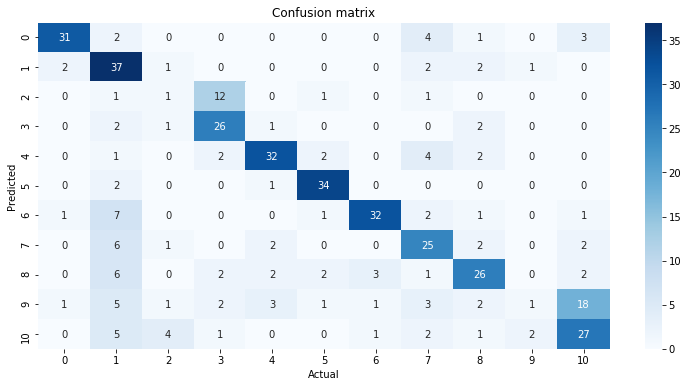

In [12]:
estimator = sclf
prediction_2 = estimator.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, estimator.predict(features_train)))
print("The test accuracy is: ")
print(accuracy_score(labels_test, prediction_2))
print("Classification report")
print(classification_report(labels_test,prediction_2))

conf_matrix = confusion_matrix(labels_test, prediction_2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

The model does not perform well

In [13]:
clf1 = XGBClassifier(
    base_score=0.5, booster=None, colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
    importance_type='gain', interaction_constraints=None,
    learning_rate=0.05, max_delta_step=0, max_depth=2,
    min_child_weight=1, monotone_constraints=None,
    n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
    objective='multi:softprob', random_state=42, reg_alpha=0,
    reg_lambda=1, scale_pos_weight=None, seed=42, subsample=1,
    tree_method=None, validate_parameters=False, verbosity=None
)


clf3 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1100,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

sclf = StackingClassifier(classifiers=[clf1, clf3], 
                          meta_classifier=nb)

sclf.fit(features_train, labels_train)

StackingClassifier(average_probas=False,
                   classifiers=[XGBClassifier(base_score=0.5, booster=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints=None,
                                              learning_rate=0.05,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=140, n_job...
                                                       min_samples_leaf=3,
                                                       min_samples_split=10

The training accuracy is: 
0.11928783382789318
The test accuracy is: 
0.0924170616113744
Classification report
              precision    recall  f1-score   support

           0       0.10      0.05      0.06        41
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        16
           3       0.08      0.91      0.15        32
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        38
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00        38
          10       0.19      0.19      0.19        43

    accuracy                           0.09       422
   macro avg       0.03      0.10      0.04       422
weighted avg       0.03      0.09      0.04       422



/home/kevin/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


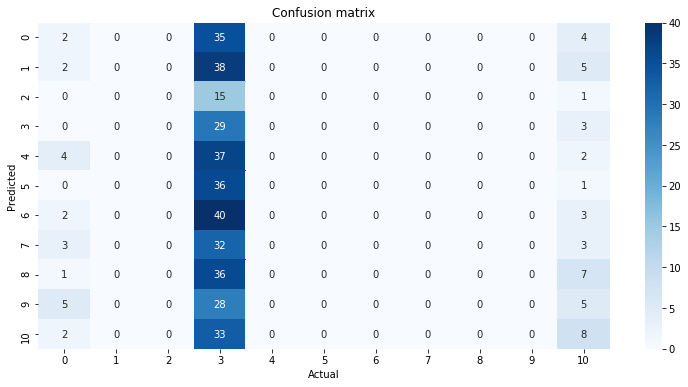

In [14]:
estimator = sclf
prediction_2 = estimator.predict(features_test)
print("The training accuracy is: ")
print(accuracy_score(labels_train, estimator.predict(features_train)))
print("The test accuracy is: ")
print(accuracy_score(labels_test, prediction_2))
print("Classification report")
print(classification_report(labels_test,prediction_2))

conf_matrix = confusion_matrix(labels_test, prediction_2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()